<a href="https://colab.research.google.com/github/phoumithona/matrix_computation/blob/master/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

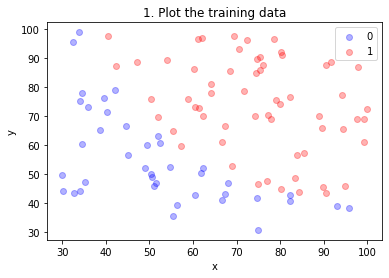

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

#plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b', label='0')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r', label='1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('1. Plot the training data')
plt.show()

In [2]:
# initial value for theta_0,1,2,3
theta_0 = -9  
theta_1 = -0.1
theta_2 = -0.2

lr = 0.0001       # learning rate
iterations = 1000    # number of iterations
m = len(x)           # number of features

J      = []
theta0 = []
theta1 = []
theta2 = []

# loop for updating with iterations
for i in range (iterations):
    z  = theta_0 + theta_1 * x + theta_2 * y  #logistic regression equation
    h  = 1/(1 + np.exp(-z))                   #sigmoid function
    dh = h *(1-h)                             #derivative of h
    
    #cost function
    cost = (1/m)*(sum(-label*np.log10(h)-(1-label)*np.log10(1-h)))
    J.append(cost)
               
    theta_0 = theta_0 - (lr/m)*(sum(h -label))
    theta0.append(theta_0)
    theta_1 = theta_1 - (lr/m)*(sum((h - label)*x))
    theta1.append(theta_1)
    theta_2 = theta_2 - (lr/m)*(sum((h - label)*y))
    theta2.append(theta_2)
    
# printing the final theta values             
print('final theta_0 = ',theta_0)
print('final theta_1 = ',theta_1)
print('final theta_2 = ',theta_2)
print('final cost    = ', cost)

final theta_0 =  -8.99853630973029
final theta_1 =  0.07771650192004212
final theta_2 =  0.07112599300991106
final cost    =  0.1249771028237877


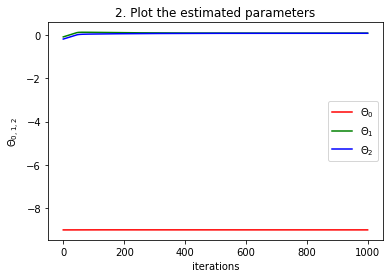

In [3]:
# Plot the estimated parameters
plt.plot(theta0,'r', label='$ \Theta_0 $')
plt.plot(theta1,'g', label='$ \Theta_1 $')
plt.plot(theta2,'b', label='$ \Theta_2 $')
plt.xlabel('iterations')
plt.ylabel('$\Theta_{0,1,2}$')
plt.legend()
plt.title('2. Plot the estimated parameters')
plt.show()

Training Error =  0.1249771028237877


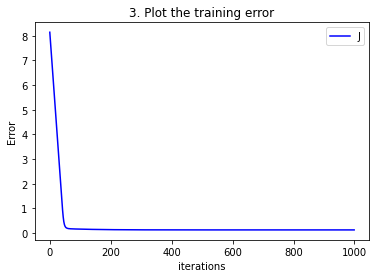

In [4]:
# Plot the training error
plt.plot(J, color='b', label='J')
print('Training Error = ', cost)
plt.xlabel('iterations')
plt.ylabel('Error')
plt.legend()
plt.title('3. Plot the training error')
plt.show()

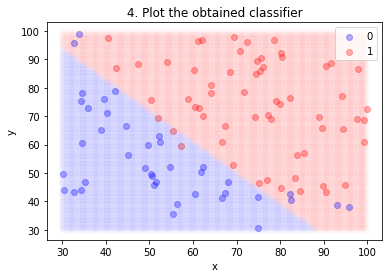

In [5]:
xx = np.arange(30,100,0.5) # generate x = 30 through 100 with 0.5 step
yy = np.arange(30,100,0.5) # generate y = 30 through 100 with 0.5 step
zz = np.zeros(len(xx)*len(yy))
X  = np.zeros(len(xx)*len(yy))
Y  = np.zeros(len(xx)*len(yy))
k  = 0

for i in range(len(xx)):          # scatter x
  for j in range(len(yy)):        # scatter y
    zz[k] = theta_0 + theta_1*xx[i] + theta_2*yy[j]
    X[k] = xx[i]
    Y[k] = yy[j]
    k += 1;

sig = np.divide(np.ones(len(zz)), 1 + np.exp(-zz))  
x_l0 = X[sig < 0.5]           
x_l1 = X[sig >= 0.5]

y_l0 = Y[sig < 0.5]
y_l1 = Y[sig >= 0.5]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]
    
plt.scatter(x_l0, y_l0, alpha=0.01, color='b')
plt.scatter(x_l1, y_l1, alpha=0.01, color='r')
plt.scatter(x_label0, y_label0, alpha=0.3, c='b', label='0')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r', label='1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('4. Plot the obtained classifier')
plt.show()